In [1]:
import sys
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("C://Users//chuen//Music//Project//0.csv//diabetes.csv")

df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


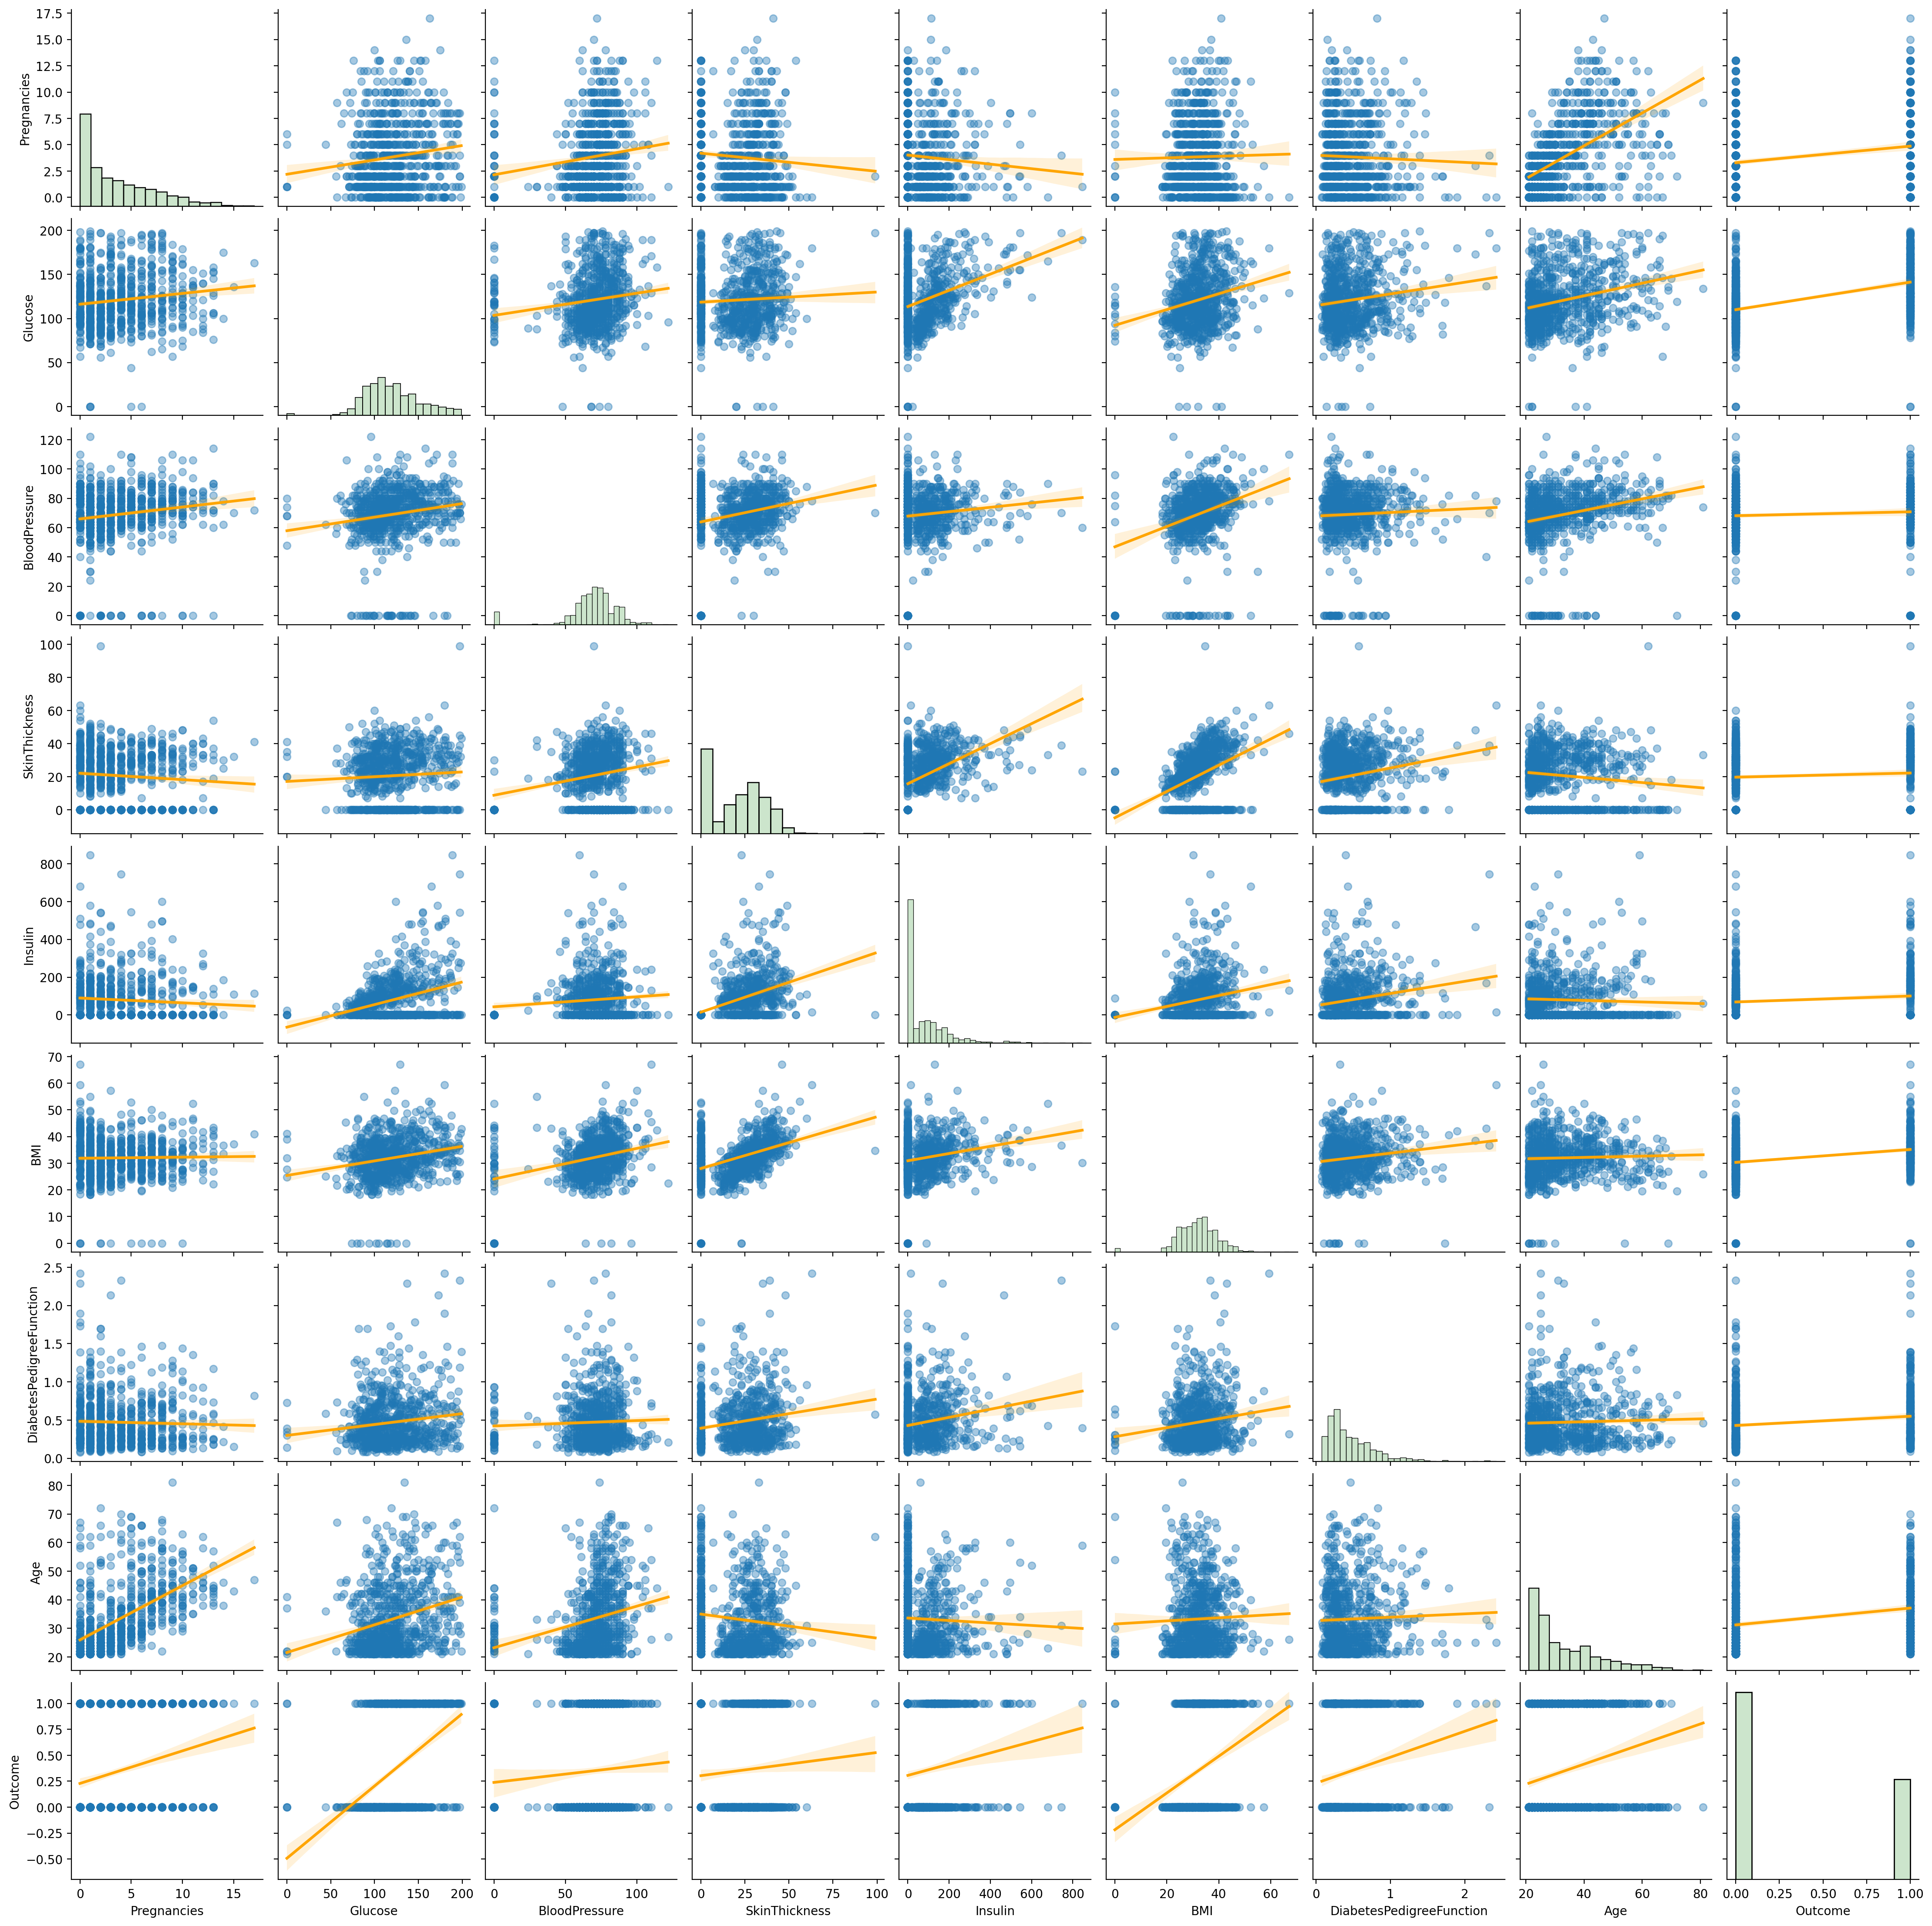

In [5]:
sns.pairplot(df,
             kind='reg', 
             plot_kws={'scatter_kws': {'alpha': 0.4}, 
                       'line_kws': {'color': 'orange'}},
             diag_kws={'color': 'green', 'alpha':.2});

In [6]:
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb

from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score
from sklearn import metrics

In [7]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

## Feature importance with randomforest

In [8]:

model= RandomForestClassifier(n_estimators=250, random_state=7)

X=df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]
y=df['Outcome']
model.fit(X,y)

RandomForestClassifier(n_estimators=250, random_state=7)

In [9]:
fs=pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=True)
fs

SkinThickness               0.069152
Insulin                     0.072271
Pregnancies                 0.084649
BloodPressure               0.086864
DiabetesPedigreeFunction    0.124646
Age                         0.137689
BMI                         0.169347
Glucose                     0.255382
dtype: float64

<Axes: >

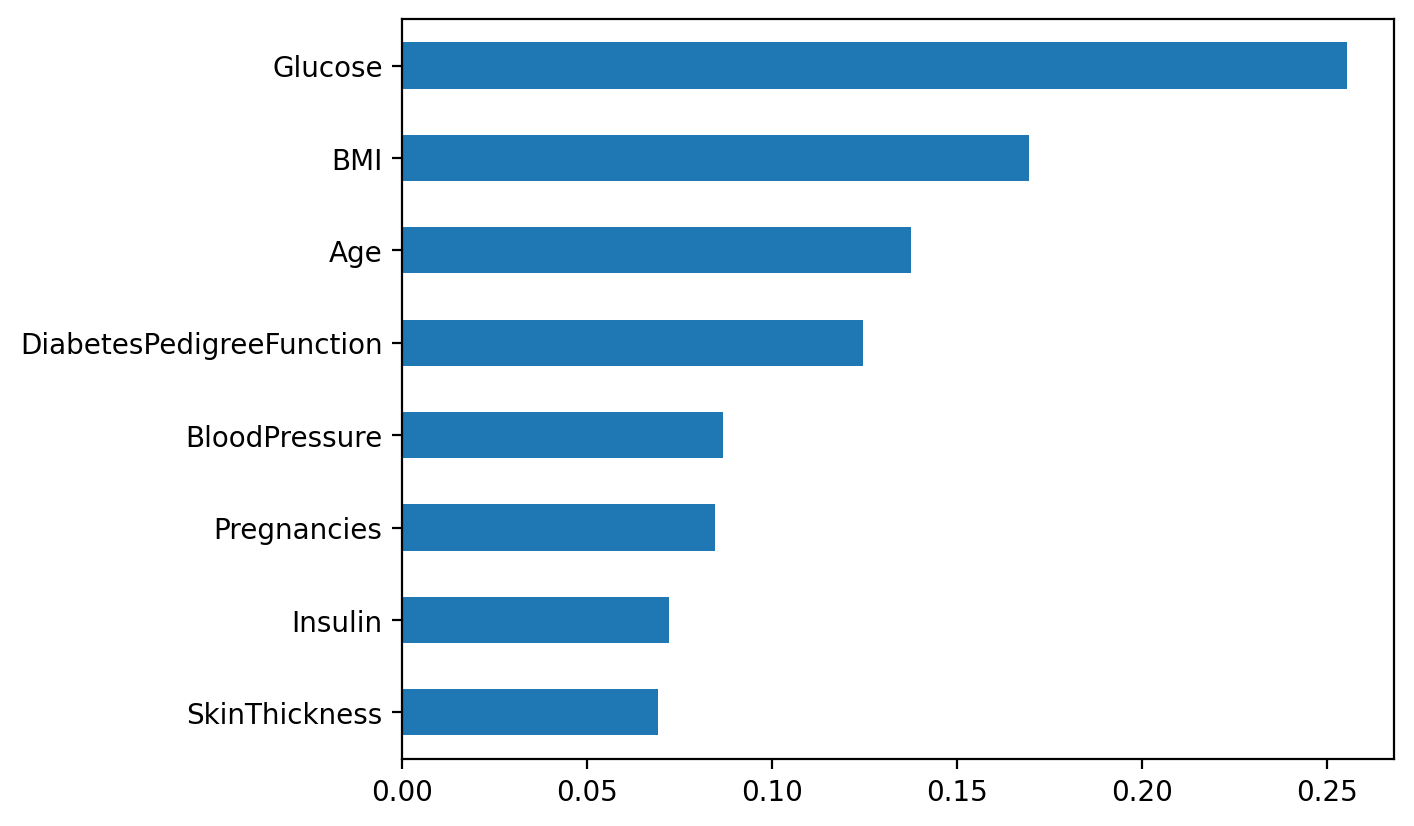

In [10]:
fs.plot(kind='barh')

## Feature importance with lightgbm

In [11]:
model1 = lgb.LGBMClassifier(n_estimators=250, random_state=7)
model1.fit(X,y)

[LightGBM] [Info] Number of positive: 268, number of negative: 500
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000115 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 764
[LightGBM] [Info] Number of data points in the train set: 768, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348958 -> initscore=-0.623621
[LightGBM] [Info] Start training from score -0.623621
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

LGBMClassifier(n_estimators=250, random_state=7)

In [12]:
importances = model1.feature_importances_

In [13]:
importances_normalized = importances / np.sum(importances)

In [14]:
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Normalized Importance': importances_normalized
})

In [15]:
feature_importance_df.set_index('Feature', inplace=True)

In [16]:
fs1 =feature_importance_df.sort_values(by='Normalized Importance')


In [17]:
feature_importance_df.sort_values(by='Normalized Importance')

Normalized Importance
Feature                                        
Insulin                                0.069502
Pregnancies                            0.071515
SkinThickness                          0.080370
BloodPressure                          0.111499
Age                                    0.129478
BMI                                    0.167449
Glucose                                0.171475
DiabetesPedigreeFunction               0.198712

<Axes: ylabel='Feature'>

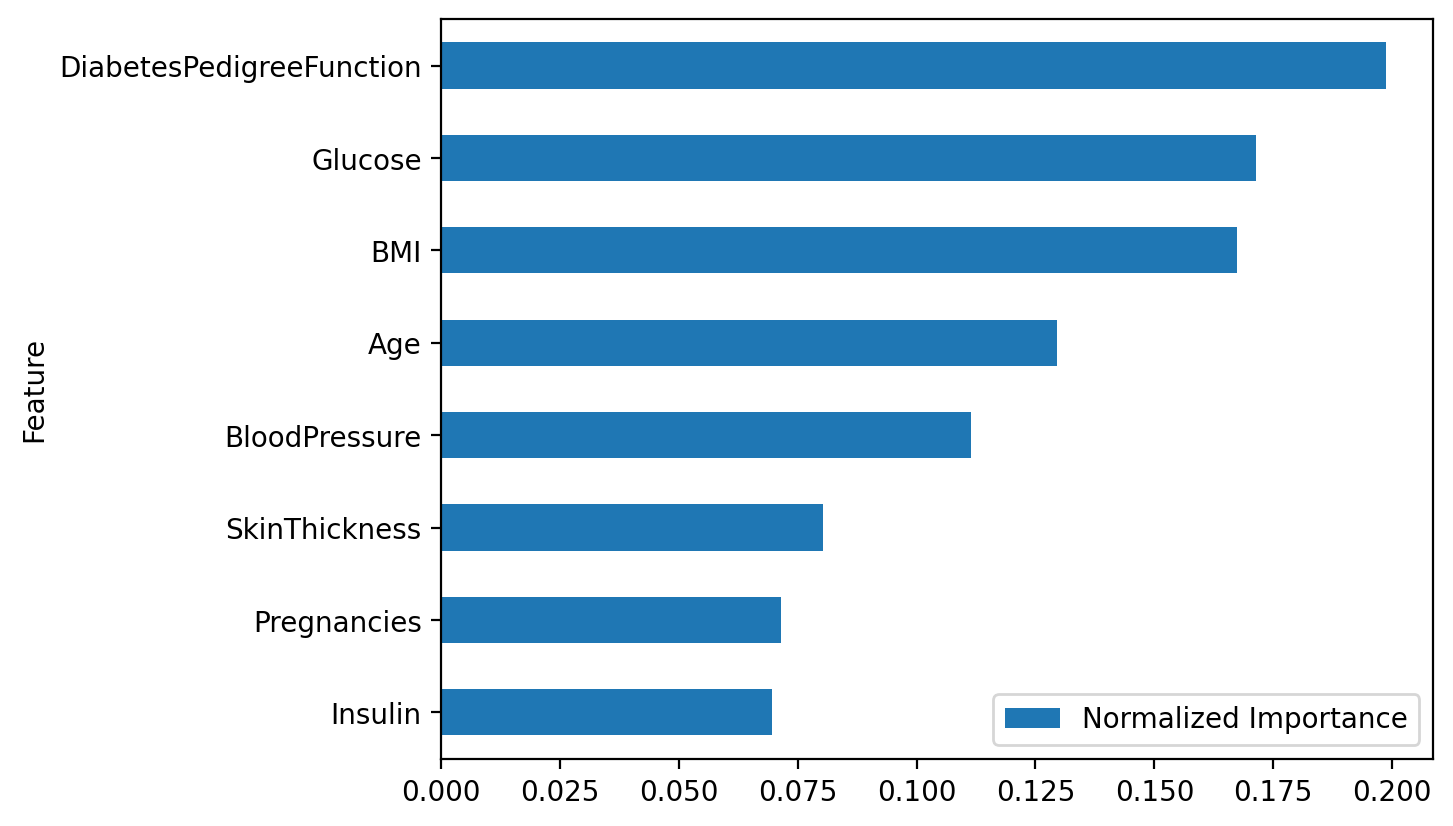

In [18]:
fs1.plot(kind='barh')

## statsmodel

In [19]:
import statsmodels.api as sm

In [20]:
X = sm.add_constant(X)

In [21]:
modelstat = sm.OLS(y, X)

In [22]:
results = modelstat.fit()

In [23]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Outcome   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     41.29
Date:                Mon, 19 Aug 2024   Prob (F-statistic):           7.36e-55
Time:                        11:16:31   Log-Likelihood:                -381.91
No. Observations:                 768   AIC:                             781.8
Df Residuals:                     759   BIC:                             823.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

##  Implement

In [24]:
X=df[['DiabetesPedigreeFunction','Age', 'BMI','Glucose',]]
X.head()

DiabetesPedigreeFunction  Age   BMI  Glucose
0                     0.627   50  33.6      148
1                     0.351   31  26.6       85
2                     0.672   32  23.3      183
3                     0.167   21  28.1       89
4                     2.288   33  43.1      137

In [26]:
vif = pd.DataFrame()
vif['Feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

                    Feature        VIF
0  DiabetesPedigreeFunction   3.100008
1                       Age   8.435058
2                       BMI  12.101693
3                   Glucose  14.536477


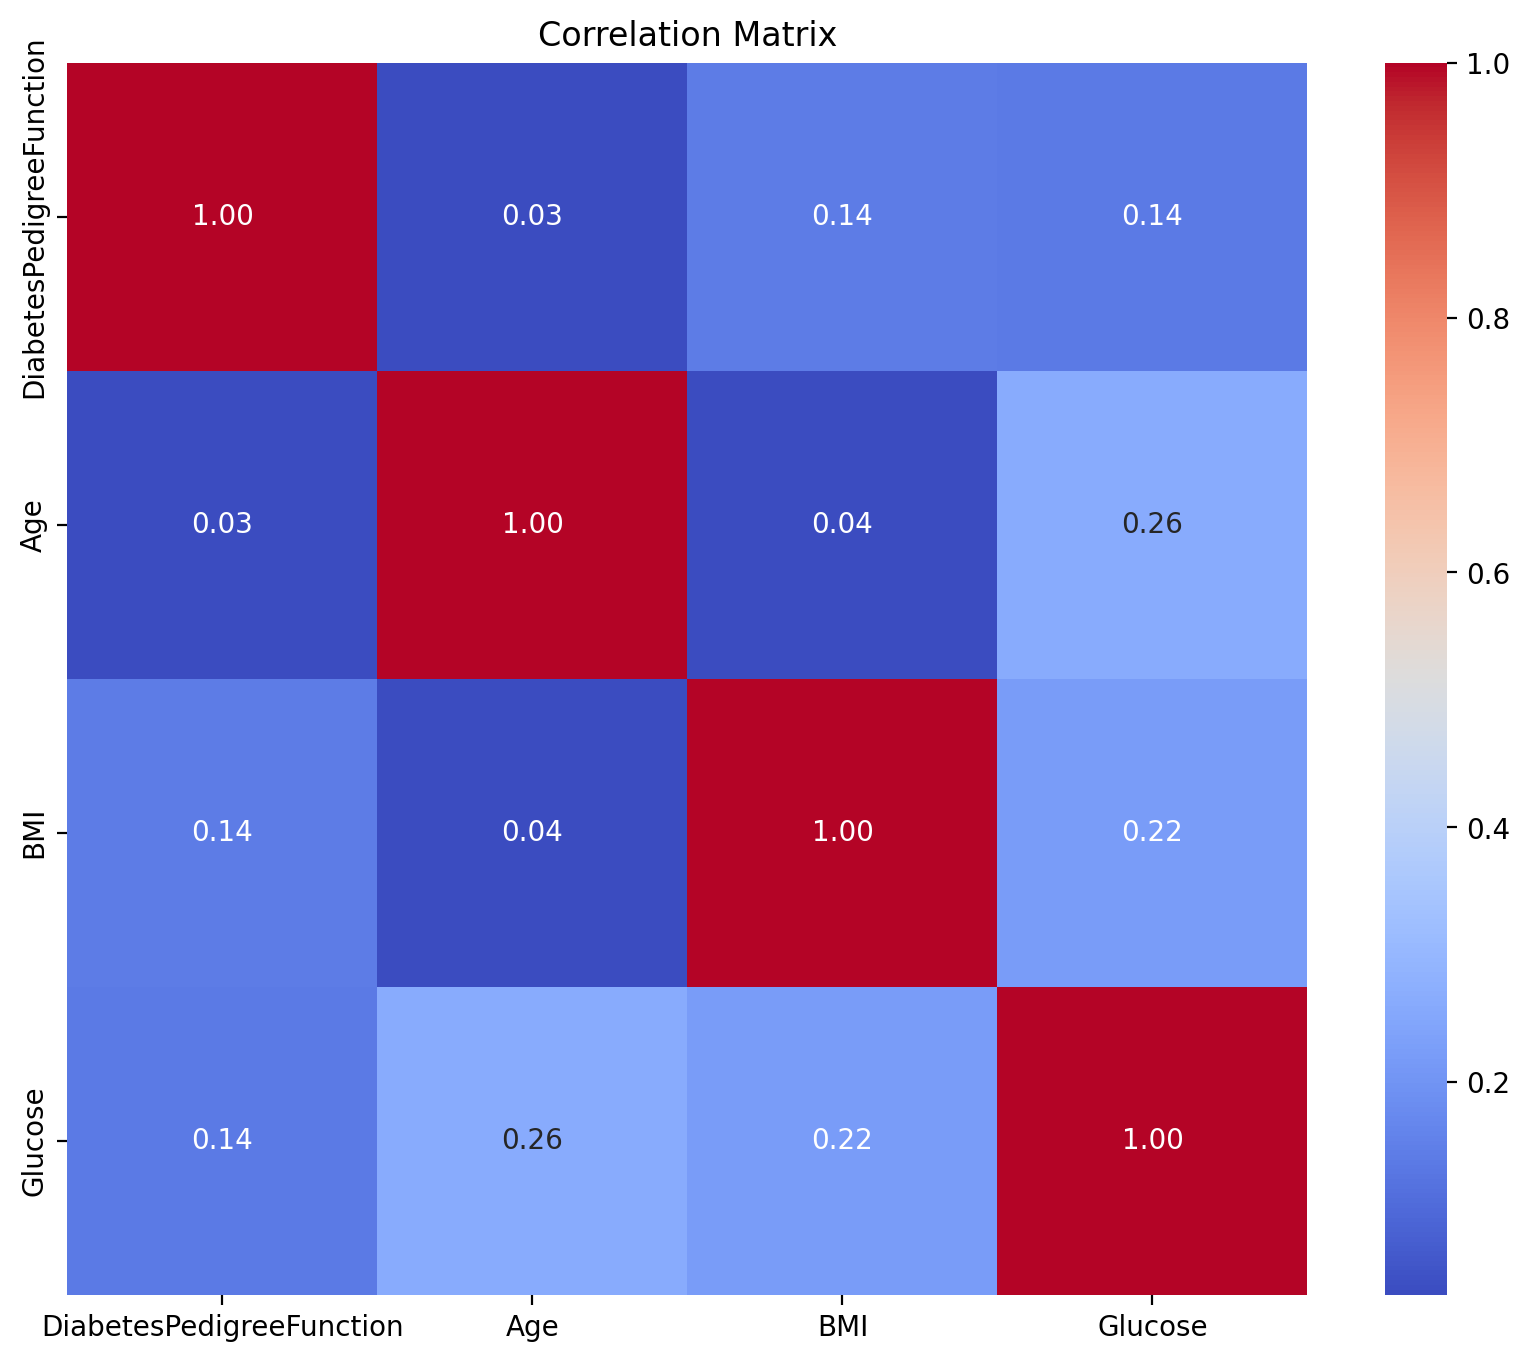

In [27]:
correlation_matrix = X.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [28]:
columns_list = X.columns.tolist()
columns_list

['DiabetesPedigreeFunction', 'Age', 'BMI', 'Glucose']

In [29]:
selected_features_df = feature_importance_df.loc[columns_list]

In [30]:
selected_features_df['Normalized Importance'].sum()

0.6671139138601905

## Data partition¶

In [31]:
test_size=.3
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=test_size, 
                                                    stratify=y,
                                                    random_state=7)

In [32]:
algo = [
    [KNeighborsClassifier(n_neighbors =5),"KNeighborsClassifier"],
    [LogisticRegression(penalty='l2') , "LogisticRegression"],      
    [RandomForestClassifier(n_estimators=200, max_depth=3) , "RandomForestClassifier"],    
    [GaussianNB() , "GaussianNB"],
    [SVC(kernel ="linear" , C=1),"SVC_linear"], 

]

model_scores=[]
for a in algo:
    model2 = a[0]
    model2.fit(X_train, y_train)
    score=model2.score(X_test, y_test)
    model_scores.append([score, a[1]])
    y_pred=model2.predict(X_test)
    print(f'{a[1]:20} score: {score:.04f}')
    print(metrics.confusion_matrix(y_test, y_pred))
    print(metrics.classification_report(y_test, y_pred))
    print('-' * 100)


print(f'best score = {max(model_scores)}') 

KNeighborsClassifier score: 0.7403
[[125  25]
 [ 35  46]]
              precision    recall  f1-score   support

           0       0.78      0.83      0.81       150
           1       0.65      0.57      0.61        81

    accuracy                           0.74       231
   macro avg       0.71      0.70      0.71       231
weighted avg       0.73      0.74      0.74       231

----------------------------------------------------------------------------------------------------
LogisticRegression   score: 0.7879
[[137  13]
 [ 36  45]]
              precision    recall  f1-score   support

           0       0.79      0.91      0.85       150
           1       0.78      0.56      0.65        81

    accuracy                           0.79       231
   macro avg       0.78      0.73      0.75       231
weighted avg       0.79      0.79      0.78       231

----------------------------------------------------------------------------------------------------
RandomForestClassifier score

In [33]:
model_scores

[[0.7402597402597403, 'KNeighborsClassifier'],
 [0.7878787878787878, 'LogisticRegression'],
 [0.7489177489177489, 'RandomForestClassifier'],
 [0.7835497835497836, 'GaussianNB'],
 [0.7792207792207793, 'SVC_linear']]

In [34]:
dscore = pd.DataFrame(model_scores, columns=['score', 'classifier'])
dscore.sort_values('score', ascending=False)

score              classifier
1  0.787879      LogisticRegression
3  0.783550              GaussianNB
4  0.779221              SVC_linear
2  0.748918  RandomForestClassifier
0  0.740260    KNeighborsClassifier

## Gradient Boosting 

In [35]:
import xgboost as xgb
import lightgbm as lgb

In [36]:
#XGboost

In [37]:
param_dist = {
    'max_depth': [3, 6, 8, 10],
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [50, 100, 200],
    'subsample': [0.7, 0.8, 0.9]

}

In [38]:
xgb_model = xgb.XGBClassifier(objective='binary:logistic')

In [39]:
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=50,  
    scoring='accuracy',
    cv=5, 
    verbose=1,
    random_state=42,
    n_jobs=-1 
)


In [40]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.3],
                                        'max_depth': [3, 6, 8, 10],
                                        'n_estimators': [50, 100, 200],
                                        'subsample': [0.7, 0.8, 0.9]},
                   random_state=42, scoring='accuracy', verbose=1)

In [41]:
print("Best parameters found: ", random_search.best_params_)

Best parameters found:  {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.01}


In [42]:
print(f'Best Score: {random_search.best_score_:.4f}')

Best Score: 0.7654


In [43]:
best_model = random_search.best_estimator_
y_pred1 = best_model.predict(X_test)


In [44]:
accuracy = accuracy_score(y_test, y_pred1)
print(f'Best XGBoost Accuracy: {accuracy:.4f}')

Best XGBoost Accuracy: 0.7532


In [45]:
report = classification_report(y_test, y_pred1, target_names=['Class 0', 'Class 1'])

In [46]:
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.77      0.89      0.82       150
     Class 1       0.71      0.51      0.59        81

    accuracy                           0.75       231
   macro avg       0.74      0.70      0.71       231
weighted avg       0.75      0.75      0.74       231



In [47]:
model_scores.append([accuracy, "XGBoost"])

In [48]:
#lightgbm

In [49]:
param_dist1 = {
    'max_depth': [3, 6, 8, 10],
    'learning_rate':(0.01, 0.2),
    'n_estimators': [50, 100, 200], 
    'feature_fraction': (0.6,0.7, 0.8), 
    'bagging_fraction': (0.6,0.7, 0.8), 
    'bagging_freq': [1, 5, 7, 10]
}

In [50]:
lgbm = lgb.LGBMClassifier()

In [51]:
random_search1 = RandomizedSearchCV(
    estimator=lgbm,
    param_distributions=param_dist1,
    n_iter=50,  
    scoring='accuracy',
    cv=5,       
    verbose=1,
    random_state=42,
    n_jobs=-1
)

In [52]:
random_search1.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leave

RandomizedSearchCV(cv=5, estimator=LGBMClassifier(), n_iter=50, n_jobs=-1,
                   param_distributions={'bagging_fraction': (0.6, 0.7, 0.8),
                                        'bagging_freq': [1, 5, 7, 10],
                                        'feature_fraction': (0.6, 0.7, 0.8),
                                        'learning_rate': (0.01, 0.2),
                                        'max_depth': [3, 6, 8, 10],
                                        'n_estimators': [50, 100, 200]},
                   random_state=42, scoring='accuracy', verbose=1)

In [53]:
print(f'Best Parameters: {random_search1.best_params_}')

Best Parameters: {'n_estimators': 100, 'max_depth': 8, 'learning_rate': 0.01, 'feature_fraction': 0.8, 'bagging_freq': 1, 'bagging_fraction': 0.8}


In [54]:
random_search1.best_estimator_


LGBMClassifier(bagging_fraction=0.8, bagging_freq=1, feature_fraction=0.8,
               learning_rate=0.01, max_depth=8)

In [55]:
print(f'Best Score: {random_search1.best_score_:.4f}')

Best Score: 0.7673


In [56]:
y_pred2 = random_search1.best_estimator_.predict(X_test)
accuracy1 = accuracy_score(y_test, y_pred2)

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


In [57]:
accuracy1

0.7316017316017316

In [58]:
model_scores.append([accuracy1, "lightgbm"])

In [59]:
dscore = pd.DataFrame(model_scores, columns=['score', 'classifier'])
dscore.sort_values('score', ascending=False)

score              classifier
1  0.787879      LogisticRegression
3  0.783550              GaussianNB
4  0.779221              SVC_linear
5  0.753247                 XGBoost
2  0.748918  RandomForestClassifier
0  0.740260    KNeighborsClassifier
6  0.731602                lightgbm